# 네이버 식당(판다마라탕) 리뷰 크롤링

#### beautifulsoup4, selenium, xlsxwriter 설치

In [1]:
#!pip3 install beautifulsoup4

In [2]:
#!pip install selenium

In [3]:
#!pip install xlsxwriter

#### 필요한 패키지 임폴트

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import requests
import re
import pandas as pd
import numpy as np
import os
import time
import urllib.request
from selenium.webdriver.common.keys import Keys

import warnings
warnings.filterwarnings('ignore')

#### 셀레니움을 이용해 크롬드라이브 제어 및 url 가져오기

In [5]:
#/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://m.place.naver.com/restaurant/1221479388/review/visitor?entry=ple")
#time.sleep(2)

In [6]:
#driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[5]').click()

In [7]:
driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')

In [8]:
prev_height = driver.execute_script('return document.body.scrollHeight')

#### 웹자동화 : 더보기 -> 스크롤 반복

In [9]:
while True:
    try:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(3)

        current_height = driver.execute_script('return document.body.scrollHeight')

        
        driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[7]/div[2]/div[3]/div[2]/a').click()
        
        
        if prev_height == current_height:
            break
              
        prev_height = current_height
        #time.sleep(1)
    except:
        print("마지막 페이지입니다.")
        break
        
#driver.quit()
        

마지막 페이지입니다.


#### 현재페이지의 html 코드 가져오기
    여기서 에러가 발생... 
    모든 리뷰가 코드에 반영되어 있지만 가져오지 못함 
    * 해결방법: driver.page_source를 이용해 현재 페이지 코드를 가져올 수 있었음

<html lang="ko"><head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-180.png" re
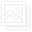
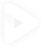
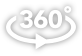
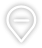

In [10]:
soup = BeautifulSoup(driver.page_source,'html.parser')
soup

In [11]:
review = soup.find('a',{'class':'xHaT3'}).get_text()
review

'은행동. 판다마라탕. 다들 식성이 달라서 가지각색. 두부탕. 감자탕. 해물탕.  ㅋㅋㅋㅋㅋ 마음대로 골라먹을 수 있고 행사라서 고기 무료!!! 대에박.내용 더보기'

In [12]:
review = soup.find('li',{'class':'YeINN'})
len(review)

5

In [13]:
review = soup.find_all('ul',{'class':'eCPGL'})
review

[<ul class="eCPGL"><li class="YeINN"><div class="Lia3P"><a class="DqSJm" href="https://m.place.naver.com/my/5efe6c8a35e32560edaadcd1/review?v=2" role="button" target="_blank"><div class="place_thumb"><img alt="프로필" class="sKXBJ" height="38" src="https://g-place.pstatic.net/assets/shared/images/icon_default_profile.png" width="38"/></div></a><a class="Hazns" href="https://m.place.naver.com/my/5efe6c8a35e32560edaadcd1/review?v=2" role="button" target="_blank"><div class="sBWyy">페로페로60</div><div class="Qde7Q"><span class="P1zUJ">리뷰 <!-- -->5</span><span class="P1zUJ">사진 <!-- -->4</span></div></a><a class="wFqB7" href="#" role="button">팔로우</a></div><div class="Mmpzx"><div class="ngGKH"><div class="flicking-viewport" style="user-select: none; -webkit-user-drag: none; touch-action: pan-y;"><div class="flicking-camera" style="transform: translate(0px);"><div class="ODalI"><a class="v3j4Z" href="#" role="button"><div class="K0PDV _img fKa0W" style='width: 100%; height: 100%; background-image: 

#### 뷰티풀수프의 find_all 을 통해 전체 리뷰 가져오기

In [14]:
review = soup.find_all('div',{'class':'ZZ4OK IwhtZ'})
review
#zPfVt
#ZZ4OK IwhtZ

[<div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">은행동. 판다마라탕. 다들 식성이 달라서 가지각색. 두부탕. 감자탕. 해물탕.  ㅋㅋㅋㅋㅋ 마음대로 골라먹을 수 있고 행사라서 고기 무료!!! 대에박.</span><span class="rvCSr"><svg aria-hidden="true" class="Ky28p" viewbox="0 0 12 7" xmlns="http://www.w3.org/2000/svg"><path d="M11.47.52a.74.74 0 00-1.04 0l-4.4 4.45v.01L1.57.52A.74.74 0 10.53 1.57l5.12 5.08a.5.5 0 00.7 0l5.12-5.08a.74.74 0 000-1.05z"></path></svg><span class="place_blind">내용 더보기</span></span></a></div>,
 <div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">못 기다리겠다 일단 한 입만 먹고 나머지 사진은 나중에 찍자</span></a></div>,
 <div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">진짜 맛있게 잘먹었습니다 여기 있는마라탕 항상 한그롯 뚝딱^^ 오늘 친구랑 같이와서 다들 맛이 다고해서  다음에 또 갈게욬ㅋ 다음에 또 오게</span><span class="rvCSr"><svg aria-hidden="true" class="Ky28p" v

In [15]:
reviews = soup.find_all('span',{'class':'zPfVt'})
reviews

[<span class="zPfVt">은행동. 판다마라탕. 다들 식성이 달라서 가지각색. 두부탕. 감자탕. 해물탕.  ㅋㅋㅋㅋㅋ 마음대로 골라먹을 수 있고 행사라서 고기 무료!!! 대에박.</span>,
 <span class="zPfVt">못 기다리겠다 일단 한 입만 먹고 나머지 사진은 나중에 찍자</span>,
 <span class="zPfVt">진짜 맛있게 잘먹었습니다 여기 있는마라탕 항상 한그롯 뚝딱^^ 오늘 친구랑 같이와서 다들 맛이 다고해서  다음에 또 갈게욬ㅋ 다음에 또 오게</span>,
 <span class="zPfVt">시험끝나고 먹으러왔어요~!~! 시험점수 날아가라~~~마라먹고 나라가라~~~~~ 마싯어요💜</span>,
 <span class="zPfVt">친구랑 주기적으로 먹으러 오는 은행동 맛집이에용 개인적으로 먹어 본 마라탕 중에 제일 맛있어요 !!</span>,
 <span class="zPfVt">가게가 2층에 있는데 깔끔하고 분위기도 좋아요
 고기 서비스 이벤트도 하고 있어서 맛있게 먹었어요</span>,
 <span class="zPfVt">은행동 판다마라탕 아이들이 좋아해서 같이 먹어봣어요 먹을만하네요 맛잇게 먹엇어요</span>,
 <span class="zPfVt">팽이버섯이 너무 맛있고, 위생도 좋아요!! 맛있어요 추천!!❤❤</span>,
 <span class="zPfVt">진짜 완젼 맛있어요!!! 사장님도 착하셔서 친구들과 매일 와요❤️</span>,
 <span class="zPfVt">맛있어요! 소스도 만들어 먹을 수 있어서 좋았습니다ㅎㅎ</span>,
 <span class="zPfVt">소스 찍어먹을 수 있어서 좋아요. 은행동 오면 꼭 먹습니다</span>,
 <span class="zPfVt">맛잇어요 ^^ 다 먹고 나갈 때 아이스크림도 퍼가세욤
 </span>,
 <span class="zPfVt">여러 번 왔는데 리뷰는 처음이에요^!^ 맛있어서 자주 와용</span>,
 <span class="zPf

In [16]:
len(reviews)

435

#### 리뷰를 데이터프레임화 시켜 엑셀파일로 저장

In [17]:
review_list = []

for review in reviews:
    comment = review.get_text()
    review_list.append(comment)

#.get_text().strip()

df2 = pd.DataFrame({'review':review_list})

In [18]:
len(df2)

435

In [19]:
df2.head(15)

,review
0,은행동. 판다마라탕. 다들 식성이 달라서 가지각색. 두부탕. 감자탕. 해물탕. ㅋ...
1,못 기다리겠다 일단 한 입만 먹고 나머지 사진은 나중에 찍자
2,진짜 맛있게 잘먹었습니다 여기 있는마라탕 항상 한그롯 뚝딱^^ 오늘 친구랑 같이와서...
3,시험끝나고 먹으러왔어요~!~! 시험점수 날아가라~~~마라먹고 나라가라~~~~~ 마싯어요💜
4,친구랑 주기적으로 먹으러 오는 은행동 맛집이에용 개인적으로 먹어 본 마라탕 중에 제...
5,가게가 2층에 있는데 깔끔하고 분위기도 좋아요\n고기 서비스 이벤트도 하고 있어서 ...
6,은행동 판다마라탕 아이들이 좋아해서 같이 먹어봣어요 먹을만하네요 맛잇게 먹엇어요
7,"팽이버섯이 너무 맛있고, 위생도 좋아요!! 맛있어요 추천!!❤❤"
8,진짜 완젼 맛있어요!!! 사장님도 착하셔서 친구들과 매일 와요❤️
9,맛있어요! 소스도 만들어 먹을 수 있어서 좋았습니다ㅎㅎ


In [20]:
df2.shape[0]

435

In [22]:
df2.to_excel('Panda_Mara_review.xlsx')